In [ ]:
!pip install scikit-ntk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.manifold import TSNE
import csv
from collections import Counter, defaultdict
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import gensim
import gensim.downloader
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from skntk import NeuralTangentKernel as NTK
import ast



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import gensim.downloader as api
import gensim

# Check Gensim version
print("Gensim version:", gensim.__version__)

# Load pre-trained FastText word embeddings
# The available FastText models can be found in Gensim's API dataset list
word_vectors = api.load('fasttext-wiki-news-subwords-300')



Gensim version: 4.3.2
Vector for 'king': [-1.2063e-01  5.1695e-03 -1.2447e-02 -7.8528e-03 -2.3738e-02 -8.2595e-02
  4.5790e-02 -1.5382e-01  6.4550e-02  1.2893e-01  2.7643e-02  1.5958e-02
  7.7559e-02  6.0516e-02  1.2737e-01  8.4766e-02  6.3890e-02 -1.7687e-01
  4.3017e-02 -1.8031e-02 -3.3041e-02  2.1930e-02 -1.1328e-02  6.6453e-02
  1.5826e-01 -2.3008e-02 -4.3616e-03 -2.2379e-02  4.4891e-02  3.0103e-03
 -1.5565e-02 -7.6785e-02 -9.2186e-02  5.7907e-02 -2.7658e-02  5.4500e-03
  1.8975e-02  4.2939e-02  3.4704e-03  4.0449e-02 -4.0245e-03 -1.1594e-01
 -5.8337e-03  3.2509e-02 -8.6535e-02  7.2000e-02 -2.2299e-02  1.3079e-02
 -3.9515e-02  6.8996e-02  9.2300e-02 -7.5371e-02  5.9412e-03 -3.4945e-02
 -3.3417e-02 -9.9982e-02  1.6438e-02  6.3739e-02 -6.2391e-02  7.8285e-04
 -2.9210e-02 -9.6416e-02  7.2910e-02  4.5905e-02 -8.3387e-02  7.1969e-02
  4.0932e-02 -5.6454e-03  1.3709e-01 -1.1793e-01 -7.1011e-02 -7.1963e-02
  6.5600e-02 -4.6315e-02 -1.7200e-02  3.4434e-02  4.4218e-02 -9.6354e-03
 -6.8105e-

In [ ]:
import gensim.downloader as api
import numpy as np
import pandas as pd

# Load the pre-trained FastText word vectors
word_vectors = api.load('fasttext-wiki-news-subwords-300')

# Load your pre-processed data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')

# Assuming 'preprocessed_joke' column contains pre-processed text data
texts = data['preprocessed_joke'].astype(str)

# Function to generate embeddings for each document
def generate_embedding(text):
    # Split the text into words
    text = str(text)
    words = text.split()
    # Initialize an empty array to store word embeddings
    embeddings = []
    for word in words:
        # Check if the word is in the vocabulary of the pre-trained FastText model
        if word in word_vectors:
            # If yes, retrieve its word embedding
            embeddings.append(word_vectors[word])
        else:
            # If the word is not in the vocabulary, append zeros (or any other default value)
            embeddings.append(np.zeros(300))  # Assuming FastText vectors are of size 300
    # Calculate the average embedding for the document
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(300)  # Return zeros if no embeddings found

# Generate embeddings for each document in your dataset
embeddings = np.array([generate_embedding(text) for text in texts])

print("Embeddings shape:", embeddings.shape)


Embeddings shape: (21860, 300)


In [ ]:
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['joke_type'] = data['joke_type']

embeddings_df.to_csv('word_embeddings.csv', index=False)


In [ ]:
# Assuming your dataset also contains labels in 'label' column
labels = data['joke_type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

In [ ]:


# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels as per your requirement
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the trained model
import joblib
joblib.dump(svm_classifier, 'svm_model.pkl')


Accuracy: 0.7731015553522416


['svm_model.pkl']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")

# Save the trained model
import joblib
joblib.dump(svm_classifier, 'svm_model.pkl')


Classification Report:
               precision    recall  f1-score   support

           0     0.6769    0.8125    0.7385      1088
           1     0.7120    0.6329    0.6701      1125
           2     0.7140    0.6525    0.6818      1079
           3     1.0000    1.0000    1.0000      1080

    accuracy                         0.7731      4372
   macro avg     0.7757    0.7745    0.7726      4372
weighted avg     0.7749    0.7731    0.7715      4372

Overall Accuracy: 0.7731015553522416

Accuracy per class:
Class '0': 0.8125
Class '1': 0.6329
Class '2': 0.6525
Class '3': 1.0000


['svm_model.pkl']

In [ ]:


# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='poly')  # You can choose different kernels as per your requirement
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7694419030192132


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")

# Save the trained model
import joblib
joblib.dump(svm_classifier, 'svm_model.pkl')


Classification Report:
               precision    recall  f1-score   support

           0     0.6826    0.7987    0.7361      1088
           1     0.6994    0.6578    0.6780      1125
           2     0.7113    0.6256    0.6657      1079
           3     0.9890    1.0000    0.9945      1080

    accuracy                         0.7694      4372
   macro avg     0.7706    0.7705    0.7686      4372
weighted avg     0.7697    0.7694    0.7676      4372

Overall Accuracy: 0.7694419030192132

Accuracy per class:
Class '0': 0.7987
Class '1': 0.6578
Class '2': 0.6256
Class '3': 1.0000


['svm_model.pkl']

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the k-NN classifier
knn_clf.fit(X_train, y_train)

# Predict labels for test set
y_pred = knn_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6280878316559927


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")

# Save the trained model
import joblib
joblib.dump(svm_classifier, 'svm_model.pkl')


Classification Report:
               precision    recall  f1-score   support

           0     0.6853    0.4062    0.5101      1088
           1     0.6541    0.4302    0.5190      1125
           2     0.5305    0.6858    0.5982      1079
           3     0.6784    1.0000    0.8084      1080

    accuracy                         0.6281      4372
   macro avg     0.6370    0.6306    0.6089      4372
weighted avg     0.6373    0.6281    0.6078      4372

Overall Accuracy: 0.6280878316559927

Accuracy per class:
Class '0': 0.4062
Class '1': 0.4302
Class '2': 0.6858
Class '3': 1.0000


['svm_model.pkl']

RF

In [ ]:
# Initialize and train the Random Forest classifier
rfc_classifier = RandomForestClassifier(n_estimators=200)  # You can adjust n_estimators for better performance
rfc_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = rfc_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7490850869167429


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.6517    0.7739    0.7076      1088
           1     0.6600    0.6142    0.6363      1125
           2     0.6950    0.6145    0.6522      1079
           3     1.0000    0.9991    0.9995      1080

    accuracy                         0.7491      4372
   macro avg     0.7517    0.7504    0.7489      4372
weighted avg     0.7505    0.7491    0.7477      4372

Overall Accuracy: 0.7490850869167429

Accuracy per class:
Class '0': 0.7739
Class '1': 0.6142
Class '2': 0.6145
Class '3': 0.9991


xXG-B

In [ ]:

from xgboost import XGBClassifier
# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softprob' if len(set(y_train)) > 2 else 'binary:logistic')
# Adjust objective for multi-class or binary classification
xgb_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7660109789569991


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.7002    0.7684    0.7327      1088
           1     0.6835    0.6489    0.6658      1125
           2     0.6831    0.6534    0.6679      1079
           3     1.0000    0.9981    0.9991      1080

    accuracy                         0.7660      4372
   macro avg     0.7667    0.7672    0.7664      4372
weighted avg     0.7657    0.7660    0.7653      4372

Overall Accuracy: 0.7660109789569991

Accuracy per class:
Class '0': 0.7684
Class '1': 0.6489
Class '2': 0.6534
Class '3': 0.9981


NTK

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ensure X_train and y_train are numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check the length of the dataset
dataset_length = len(X_train)

# Ensure that dataset contains at least 1000 elements
if dataset_length >= 1000:
    # Use stratified sampling to ensure class balance in the sampled subset
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=4000, stratify=y_train, random_state=42)

    # Initialize NTK kernel (this assumes you have the NTK implementation)
    kernel_ntk = NTK(depth=2)

    # Initialize SVM classifier with NTK kernel
    SVCClf = SVC(kernel=kernel_ntk)

    # Train the classifier
    SVCClf.fit(X_train_subset, y_train_subset)

    # Assuming X_test, y_test are your test data
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Make predictions
    y_pred = SVCClf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Dataset does not contain enough elements for 1000 random jokes.")


Accuracy: 0.7330741079597438


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.6187    0.7665    0.6847      1088
           1     0.6489    0.5947    0.6206      1125
           2     0.6828    0.5765    0.6251      1079
           3     0.9982    1.0000    0.9991      1080

    accuracy                         0.7331      4372
   macro avg     0.7371    0.7344    0.7324      4372
weighted avg     0.7360    0.7331    0.7312      4372

Overall Accuracy: 0.7330741079597438

Accuracy per class:
Class '0': 0.7665
Class '1': 0.5947
Class '2': 0.5765
Class '3': 1.0000


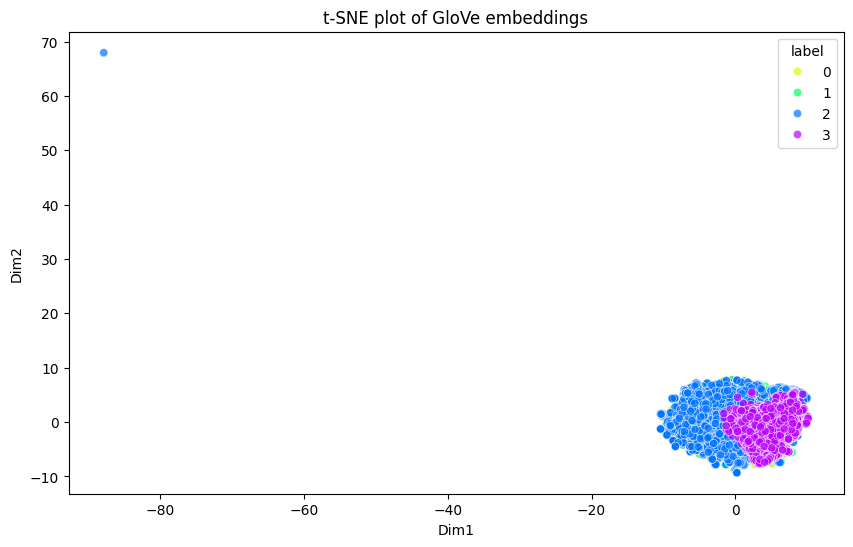

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/word_embeddings.csv')  # Update with your file path
# Assuming your CSV file has columns for each GloVe embedding dimension, e.g., 'glove_1', 'glove_2', ..., 'glove_100'
# And a column named 'label' for the joke type

# Extract features (GloVe embeddings) and labels
features = data.drop('joke_type', axis=1).values  # Assuming the embeddings start from the first column
labels = data['joke_type'].values

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_features = tsne_model.fit_transform(features)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_features, columns=['Dim1', 'Dim2'])
tsne_df['label'] = labels

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='label',
    palette=sns.color_palette("hsv", len(set(labels))),
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE plot of GloVe embeddings')
plt.show()
